# Federico Campanozzi - Progetto Data Intensive con Relazione
                                                                                                             a.a. 2021/2022

### 1a Descrizione del problema
Il problema è di classificazione e devo determinare il valore di una variabile binaria.
Significato dei dati :
- step: rappresenta un'unita di tempo 1 = 1 ora.
- type: tipo di transazione.
- amount: somma totatle di denaro spostato.
- nameOrig: codice del cliente che ha fatto la transazione.
- oldbalanceOrg: somma totale nel cc prima della transazione.
- newbalanceOrig: somma totale nel cc dopo la transazione.
- nameDest: beneficiario.
- oldbalanceDest: somma totale nel cc del beneficiario prima della transazione.
- newbalanceDest: somma totale nel cc del beneficiario dopo la transazione.
- isFraud: se è stata classificata come fraudolenta da un esperto nel settore.
- isFlaggedFraud: se è stata classificata come fraudolenta da un algoritmo di ML.

### 1b Analisi esplorativa
Il dataset è molto vasto vasto quindi l'analisi esplorativa è stata condotta su un numero ristretto di record, giusto per capire
la dimensionalità del problema

In [11]:
import import_ipynb
from myFunctions import print_eval;

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
transactions = pd.read_csv("../data/data.csv", nrows=20_000)

vista d'insieme dei dati (prima 10 righe)

In [14]:
transactions[:10]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


presentazione delle transazioni fraudolente

In [15]:
transactions[transactions["isFraud"] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.0,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
12467,7,TRANSFER,441445.58,C1023505879,441445.58,0.0,C847761155,0.0,0.00,1,0
12468,7,CASH_OUT,441445.58,C398085606,441445.58,0.0,C2072030256,98993.5,0.00,1,0
14861,8,CASH_OUT,181728.11,C2102265902,0.00,0.0,C789014007,11397.0,184477.77,1,0
18771,8,TRANSFER,222.00,C1961506277,222.00,0.0,C378841819,0.0,267095.19,1,0


statistiche sui dati con anche l'aggiunta di altri dati

In [16]:
vMtx = transactions.describe().values
vMtx = np.vstack([vMtx, [len(transactions[c].unique()) for c in ["step","amount","oldbalanceOrg",
                                                                    "newbalanceOrig","oldbalanceDest","newbalanceDest",
                                                                    "isFraud","isFlaggedFraud"]]])
vMtx = np.vstack([vMtx, transactions.describe().isna().sum().values])
pd.DataFrame(data=vMtx,
             index=['count','mean','std','min','25%','50%','75%','max','valori distinti','valori nulli'],
             columns=transactions.describe().columns)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,20000.000000,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,20000.000000,20000.0
mean,5.889400,1.259584e+05,8.050588e+05,8.215246e+05,8.159052e+05,1.174361e+06,0.004050,0.0
std,2.473979,2.967104e+05,2.213398e+06,2.255167e+06,2.481246e+06,3.147339e+06,0.063512,0.0
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,5.000000,5.272017e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,7.000000,1.582517e+04,1.994350e+04,5.718700e+03,0.000000e+00,0.000000e+00,0.000000,0.0
75%,8.000000,1.416616e+05,1.274126e+05,1.287949e+05,2.887678e+05,4.284093e+05,0.000000,0.0
max,8.000000,1.000000e+07,2.235231e+07,2.246600e+07,2.278747e+07,2.878359e+07,1.000000,0.0
valori distinti,8.000000,1.992100e+04,1.369200e+04,1.087300e+04,8.922000e+03,3.003000e+03,2.000000,1.0
valori nulli,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0


### Grifici

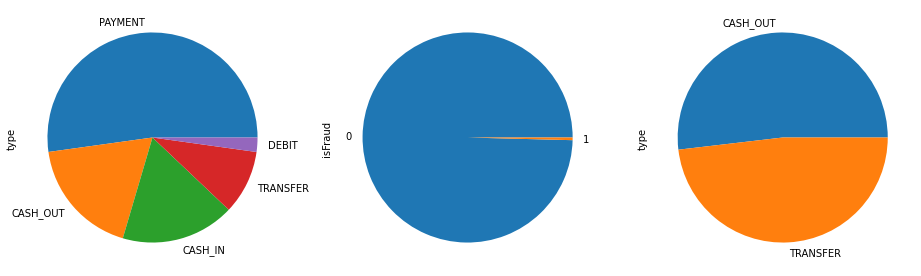

In [17]:
plt.figure(figsize=(16, 10))
transactions["type"].value_counts().plot.pie(ax=plt.subplot(1, 3, 1));
transactions["isFraud"].value_counts().plot.pie(ax=plt.subplot(1, 3, 2));
transactions[transactions["isFraud"] == 1]["type"].value_counts().plot.pie(ax=plt.subplot(1, 3,3));

per poter visualizzare i dati in un **scatter** plot ho usato la tecnica vista durante il corso **SVD** (**S**ingular **V**alue **D**ecomposition) che decompone 

In [18]:
from sklearn.utils.extmath import randomized_svd
dMtx = randomized_svd(vMtx, 2, random_state = 42)
print(len(dMtx), len(dMtx[0]), len(dMtx[1]), len(dMtx[2]))

3 10 2 2


### 2 Normalizzazione dei dati

In [19]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
X_sample = transactions[["type"]]
encoder.fit_transform(X_sample)
pd.DataFrame(
    encoder.transform(X_sample),
    columns = encoder.get_feature_names(X_sample.columns)
).head(5)

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0


### 3 Modelli predittivi

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

In [22]:
X = transactions[["type","amount","oldbalanceOrg","newbalanceOrig"]]
y = transactions[["isFraud"]]
X_train, x_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

## 3.1 Alberi di regressione

R^2 = 0.9964001799910005


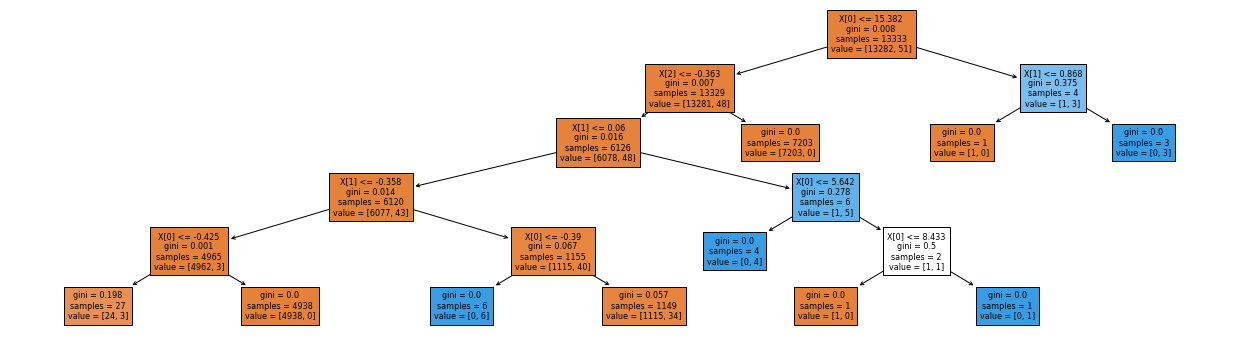

In [23]:


# creo i vettori X e y
X = transactions[["amount", "oldbalanceOrg", "newbalanceOrig"]]
y = transactions[["isFraud"]]

# mi creo i vettori che uso nel training-set e validation set con rapporto 1/3
X_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 1/3, random_state = 42)

model = Pipeline([
     ("scaler", StandardScaler()),
     ("decisionTree", DecisionTreeClassifier(max_depth=5))
])

model.fit(X_train, y_train)
print(f"R^2 = {model.score(x_val, y_val)}")

plt.figure(figsize=(22, 6))
plot_tree(model.named_steps["decisionTree"], max_depth=5, filled=True, fontsize=8);

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

# creo i vettori X e y
X = transactions.drop(columns=["isFraud","isFlaggedFraud"])
y = transactions[["isFraud"]]

# mi creo i vettori che uso nel training-set e validation set con rapporto 1/3
X_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 1/3, random_state = 42)

model = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric",StandardScaler(),["amount", "oldbalanceOrg", 
                                     "newbalanceOrig", "oldbalanceDest", 
                                     "newbalanceDest", "amount", "oldbalanceOrg", 
                                     "newbalanceOrig"]),
        ("categorical",OneHotEncoder(),["type"])
    ],remainder="drop")),
    ("decisionTree", DecisionTreeClassifier(max_depth=5))
])

model.fit(X_train, y_train)
print(f"R^2 = {model.score(x_val, y_val)}")

plt.figure(figsize=(22, 6))
plot_tree(model.named_steps["decisionTree"], max_depth=5, filled=True, fontsize=8);

Usiamo laregressione Lasso per capire le feature importanti : 

## 3.2 Modelli Di Regressione

In [24]:
from sklearn.linear_model import Lasso
X = transactions[["type","amount","oldbalanceOrg","newbalanceOrig"]]
y = transactions[["isFraud"]]
X_train, x_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)
model = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric",StandardScaler(),["amount", "oldbalanceOrg", "newbalanceOrig"]),
        ("categorical",OneHotEncoder(),["type"])
    ],remainder="drop")),
    ("regLasso", Lasso(alpha=1))
])
model.fit(X_train, y_train)
print(f"R^2 = {model.score(x_val, y_val)}")
pd.Series(model.named_steps["regLasso"].coef_)

R^2 = -0.00010161614548476194


0    0.0
1   -0.0
2   -0.0
3   -0.0
4    0.0
5   -0.0
6   -0.0
7    0.0
dtype: float64

In [25]:
from sklearn.linear_model import Ridge

model = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric",StandardScaler(),["amount", "oldbalanceOrg", "newbalanceOrig"]),
        ("categorical",OneHotEncoder(),["type"])
    ],remainder="drop")),
    ("regLasso", Ridge(alpha=1))
])
model.fit(X_train, y_train)
print(f"R^2 = {model.score(x_val, y_val)}")

R^2 = 0.06848795011728104


In [30]:
from xgboost import XGBRegressor
X = transactions[["type","amount","oldbalanceOrg","newbalanceOrig"]]
y = transactions[["isFraud"]]
X_train, x_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

xgbm = XGBRegressor(objective='reg:squarederror', 
                    learning_rate = 0.01577, 
                    reg_lambda=0.008, 
                    reg_alpha=0.0001, 
                    n_estimators=1025, 
                    verbose_eval=False)
model = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric",StandardScaler(),["amount", "oldbalanceOrg", "newbalanceOrig"]),
        ("categorical",OneHotEncoder(),["type"])
    ],remainder="drop")),
    ("XGBoost", xgbm)
])

model.fit(X_train, y_train)
print(f"R^2 = {model.score(x_val, y_val)}")

#xgbm.fit(X_train, y_train)
#print_eval(X_train, y_train,model.named_steps["XGBoost"])
#print_eval(X_val, y_val, model.named_steps["XGBoost"])

[09:59:28] WARNING: ..\src\learner.cc:576: 
Parameters: { "verbose_eval" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


R^2 = 0.49882445699949063


In [34]:
from catboost import CatBoostRegressor
model = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric",StandardScaler(),["amount", "oldbalanceOrg", "newbalanceOrig"]),
        ("categorical",OneHotEncoder(),["type"])
    ],remainder="drop")),
    ("CATBOOST", CatBoostRegressor(n_estimators=91))
])

model.fit(X_train, y_train);

Learning rate set to 0.382619
0:	learn: 0.0563843	total: 7.25ms	remaining: 652ms
1:	learn: 0.0550389	total: 14.3ms	remaining: 637ms
2:	learn: 0.0545069	total: 20.6ms	remaining: 606ms
3:	learn: 0.0495201	total: 26.8ms	remaining: 583ms
4:	learn: 0.0486180	total: 31.9ms	remaining: 548ms
5:	learn: 0.0481098	total: 36ms	remaining: 510ms
6:	learn: 0.0456583	total: 40.3ms	remaining: 483ms
7:	learn: 0.0451682	total: 43.9ms	remaining: 455ms
8:	learn: 0.0436578	total: 47.3ms	remaining: 431ms
9:	learn: 0.0423265	total: 50.7ms	remaining: 410ms
10:	learn: 0.0415527	total: 53.9ms	remaining: 392ms
11:	learn: 0.0413122	total: 57.4ms	remaining: 378ms
12:	learn: 0.0394502	total: 60.7ms	remaining: 364ms
13:	learn: 0.0388876	total: 63.9ms	remaining: 351ms
14:	learn: 0.0386048	total: 67.2ms	remaining: 341ms
15:	learn: 0.0376774	total: 70.9ms	remaining: 332ms
16:	learn: 0.0365617	total: 74.1ms	remaining: 323ms
17:	learn: 0.0358875	total: 77.3ms	remaining: 313ms
18:	learn: 0.0358095	total: 80.2ms	remaining: 

In [35]:
from lightgbm import LGBMRegressor
model = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric",StandardScaler(),["amount", "oldbalanceOrg", "newbalanceOrig"]),
        ("categorical",OneHotEncoder(),["type"])
    ],remainder="drop")),
    ("LGBM", LGBMRegressor(num_trees = 1025, learning_rate = 0.177, reg_lambda=0.001, reg_alpha=0.0001))
])

model.fit(X_train, y_train)
print(f"R^2 = {model.score(x_val, y_val)}")

C:\Users\Federico\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Federico\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] num_iterations is set=1025, num_trees=1025 will be ignored. Current value: num_iterations=1025
R^2 = 0.6140220778590246


Questi score sono alti perchè le classi sono molto sblilanciate come abbiamo visto all'inizio quindi usiamo misure più accurate 
come f1-measure che si basa su recall .... 

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score

 Possiamo utilizzare algoritmi più avanzati utilizzando le librerie lightgbm, xgboost e catboost

In [39]:
from sklearn.svm import SVC

model = Pipeline([
    ("preproc", ColumnTransformer([
        ("numeric",StandardScaler(),["amount", "oldbalanceOrg", "newbalanceOrig"]),
        ("categorical",OneHotEncoder(),["type"])
    ],remainder="drop")),
    ("SVM", SVC(kernel='rbf',random_state=42))
])

model.fit(X_train, y_train)
print(f"R^2 = {model.score(x_val, y_val)}")

C:\Users\Federico\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R^2 = 0.9955002249887506


## 4. Valutazione

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold

grid = {
    "scale": [None, StandardScaler()],
    "poly__degree": list(range(1, 7))
}

kf = KFold(3, shuffle=True, random_state=42)
gs = GridSearchCV(model, grid, cv=kf)
gs.fit(data_train, y_train);
pd.DataFrame(gs.cv_results_).sort_values("rank_test_score")

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(3)

dgrid = {
    "scale": [None, StandardScaler()],
    "poly__degree": list(range(1, 7))
}

kf = KFold(3, shuffle=True, random_state=42)
gs = GridSearchCV(model, grid, cv=kf)
gs.fit(data_train, y_train);

pd.DataFrame(gs.cv_results_).sort_values("rank_test_score")

## 5. Conclusioni 

## 6. Link alle risorse
#### Link al dataset di kaggle
https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset

## Appunti ( da eliminare)
- essendo il dataset molto grande e accessibile pubblicamente, non serve che includa il file nella consegna del progetto ma basta che inserisca nel file Jupyter un link per trovarlo
- sempre essendo il dataset molto grande, per mantenere tempi di calcolo contenuti può svolgere training e validation solo su un piccolo sottoinsieme, magari lasciando alla fine il test su tutti i restanti dati solo sui 2-3 modelli migliori
- ci sono campi stringa con moltissimi valori distinti, è opportuno preprocessarli in qualche modo se li vuole usare